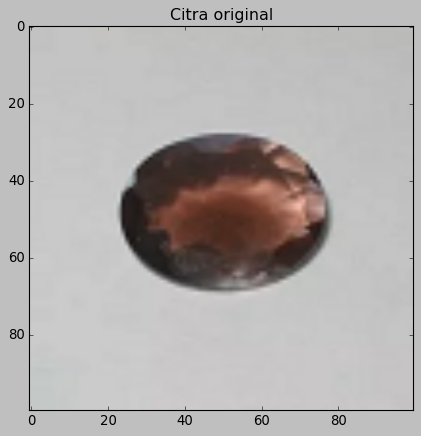

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

def sobelOperator(img):
    container = np.copy(img)
    size = container.shape
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            gx = (img[i - 1][j + 1] + 2*img[i][j + 1] + img[i + 1][j + 1]) - (img[i - 1][j - 1] + 2*img[i][j - 1] + img[i + 1][j - 1])
            gy = (img[i - 1][j - 1] + 2*img[i - 1][j] + img[i - 1][j + 1]) - (img[i + 1][j - 1] + 2*img[i + 1][j] + img[i + 1][j + 1])
            container[i][j] = min(255, np.sqrt(gx**2 + gy**2))
    return container
    pass

imgOri = cv2.imread("Images/d1.jpg")

#Citra original
plt.title('Citra original')
plt.imshow(imgOri)
plt.show()

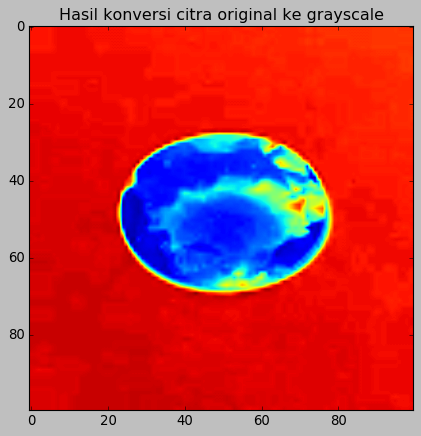

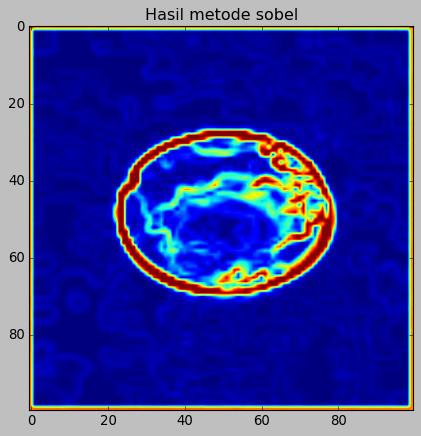

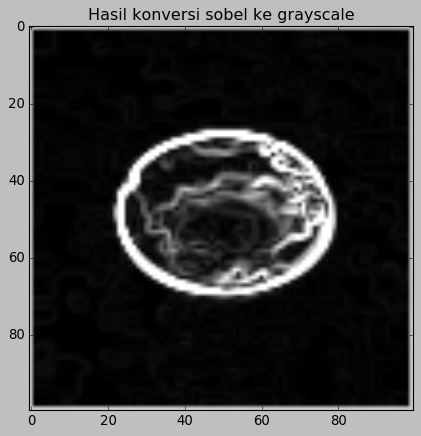

In [3]:
#Convert ke grayscale
img = cv2.cvtColor(imgOri, cv2.COLOR_BGR2GRAY)
#cv2.imshow('Grayscale',img)
#cv2.waitKey(0)
plt.title('Hasil konversi citra original ke grayscale')
plt.imshow(img)
plt.show()

#Citra hasil grayscale akan diproses menggunakan metode sobel
img = sobelOperator(img)
#cv2.imshow('Sobel',img)
#cv2.waitKey(0)
plt.title('Hasil metode sobel')
plt.imshow(img)
plt.show()

#Konversi sobel ke grayscale
plt.title('Hasil konversi sobel ke grayscale')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
#plt.imshow(img)
plt.show()

In [4]:
np.set_printoptions(threshold=np.inf)
print(img)

[[194 194 194 194 194 193 195 196 196 196 196 196 196 196 196 195 194 195
  195 194 195 195 195 195 195 194 192 193 193 193 193 193 191 192 191 193
  193 193 191 192 192 191 193 193 193 193 191 192 192 192 191 192 190 192
  192 191 188 189 190 192 192 191 189 189 191 191 191 191 191 191 189 190
  187 187 190 187 188 188 188 188 188 188 188 188 188 188 188 188 188 187
  187 187 187 187 187 186 188 188 188 188]
 [194   0   0   0   4   4  12   4   0   0   0   0   0   0   4   5   2   1
    1   2   1   0   0   0   6   8   5   5   4   4   4   7   7   2   7   7
    4   5   5   1   1   2   5   8   7   3   6   1   0   2   4   5   4   3
    5   0   7   9   5   1   8   7   1   1   3   2   1   0   0   4   5  11
   12  14   8  11   4   2   4   4   4   4   3   1   0   0   0   0   4   4
    0   0   0   0   3   0   5   8   8 187]
 [194   0   0   0   4   4  12   4   0   0   0   0   0   0   3   4   1   0
    0   0   0   0   0   0   6   5   4   7   8   8   7   8   9   8   7   4
    1   4   4   6   6   5 

In [5]:
h,w = np.shape(img)
t0=127
t=127 #initial condition
g1 = []
g2 = []
# camel_Prewitt camel_Prewitt_X camel_Prewitt_Y
#calculating t by algorithm
while(1):
    for px in range(0,h):
        for py in range(0,w):
            if (img[px][py] < t):
                g1.append(img[px][py])
            else:
                g2.append(img[px][py])
    mu1 = sum(g1) / len(g1)
    mu2 = sum(g2) / len(g2)
    t0=t
    t = ((mu1+ mu2)/2)
    delta_t = abs(t-t0)
#     print(mu1,mu2,t,delta_t)
    if(delta_t < 1):
        break
print(t)
rata2 = round(t,0)
print(rata2)

107.80893880190196
108.0


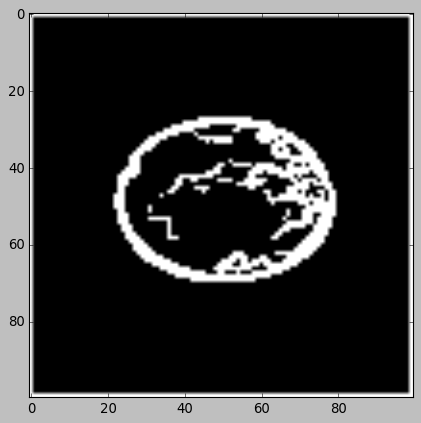

In [6]:
# thres_finder(img)
np.shape(img)
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

setelahnya = global_threshold(img,t,255,0)
plt.imshow(setelahnya, cmap='gray', vmin=0, vmax=255)

In [7]:
print(img)

[[194 194 194 194 194 193 195 196 196 196 196 196 196 196 196 195 194 195
  195 194 195 195 195 195 195 194 192 193 193 193 193 193 191 192 191 193
  193 193 191 192 192 191 193 193 193 193 191 192 192 192 191 192 190 192
  192 191 188 189 190 192 192 191 189 189 191 191 191 191 191 191 189 190
  187 187 190 187 188 188 188 188 188 188 188 188 188 188 188 188 188 187
  187 187 187 187 187 186 188 188 188 188]
 [194   0   0   0   4   4  12   4   0   0   0   0   0   0   4   5   2   1
    1   2   1   0   0   0   6   8   5   5   4   4   4   7   7   2   7   7
    4   5   5   1   1   2   5   8   7   3   6   1   0   2   4   5   4   3
    5   0   7   9   5   1   8   7   1   1   3   2   1   0   0   4   5  11
   12  14   8  11   4   2   4   4   4   4   3   1   0   0   0   0   4   4
    0   0   0   0   3   0   5   8   8 187]
 [194   0   0   0   4   4  12   4   0   0   0   0   0   0   3   4   1   0
    0   0   0   0   0   0   6   5   4   7   8   8   7   8   9   8   7   4
    1   4   4   6   6   5 